<a href="https://colab.research.google.com/github/youngsilver-kim/CV_object_detection/blob/main/2025_08_05_YOLOv8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 가져오기


In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1-3QwjsTlDLGuK0JYU_XbweNkaKfnyMmW&export=download
!unzip 컴퓨터비전_09YOLOv8_deadchicken.zip
!rm 컴퓨터비전_09YOLOv8_deadchicken.zip

Downloading...
From (original): https://drive.google.com/u/0/uc?id=1-3QwjsTlDLGuK0JYU_XbweNkaKfnyMmW
From (redirected): https://drive.google.com/uc?id=1-3QwjsTlDLGuK0JYU_XbweNkaKfnyMmW&confirm=t&uuid=4dfa0121-36fe-49b8-8dd6-49090c5028e5
To: /content/컴퓨터비전_09YOLOv8_deadchicken.zip
100% 65.5M/65.5M [00:00<00:00, 89.6MB/s]
Archive:  컴퓨터비전_09YOLOv8_deadchicken.zip
replace best.pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# YOLOv8 설치

In [ ]:
!pip install ultralytics

# OpenCV 설치

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

# YOLOv8을 이용하여 이미지에서 객체 탐지


0: 640x640 1 person, 3 cars, 1 skateboard, 327.4ms
1: 640x640 1 person, 1 car, 327.4ms
2: 640x640 1 banana, 1 apple, 327.4ms
Speed: 14.7ms preprocess, 327.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


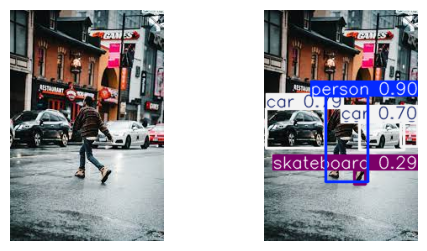

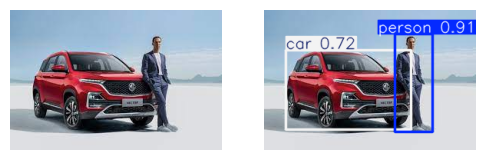

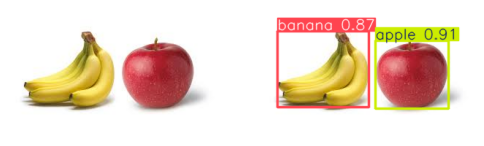

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO('yolov8n.pt')
#results = model.predict('./images/apple1.png')
results = model(["./images/image1.jpg", "./images/image2.jpg", "./images/image3.jpg"])  # return a list of Results objects

for result in results:
  im1 = result.orig_img
  im2 = result.plot()

  plt.figure(figsize=(6, 3))

  plt.subplot(1,2,1)
  plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.show()


# 바운딩 박스 외 결과값 직접 출력하기


0: 640x640 1 person, 3 cars, 1 skateboard, 362.1ms
1: 640x640 1 person, 1 car, 362.1ms
2: 640x640 1 banana, 1 apple, 362.1ms
Speed: 3.6ms preprocess, 362.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


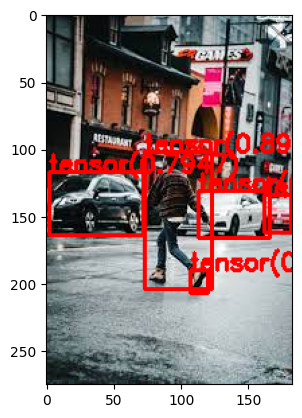

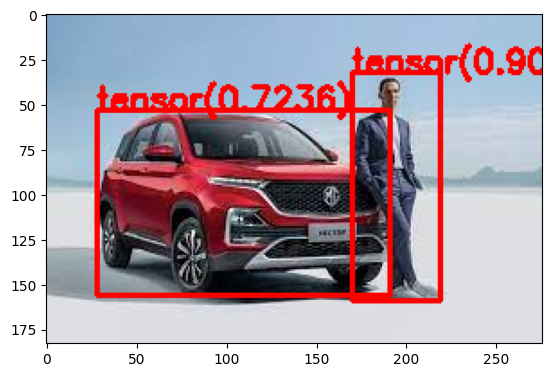

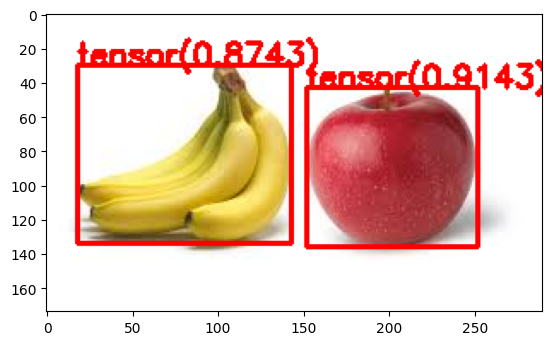

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO('yolov8n.pt')
# results = model.predict('./images/apple1.png')
results = model(["./images/image1.jpg", "./images/image2.jpg", "./images/image3.jpg"])  # return a list of Results objects

for result in results:
  im3 = result.orig_img.copy()
  for box, conf in zip(result.boxes.xyxy, result.boxes.conf):
    x1, y1, x2, y2 = [int(p) for p in box]
    cv2.rectangle(im3, (x1, y1), (x2, y2), (0,0,255), 2)
    cv2.putText(im3, str(conf), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)
  plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
ms = ['가', '나', '다', '라']
ns = ['A', 'B', 'C', 'D']
ss = [['가','A'], ['나','B'], ['다','C'], ['라','D']]

# for m in ms:
#   print(m)

# for n in ns:
#   print(n)

for s in ss:
  print(s)

for m, n in ss:
  print(m, n)

# Tensor

## Colab 환경에서는 실행되도록 수정하여 Colab에서 실행됨

In [ ]:
# Intel OpenMP 런타임 라이브러리(libiomp5md.dll)가 이미 초기화된 상태에서 다시 초기화하려 할 때 발생하는 오류 해결
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

from ultralytics import YOLO
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

model = YOLO("./runs/detect/train/weights/best.pt")
#model = YOLO("./best.pt")

cap = cv2.VideoCapture("./images/0_8_IPC1_20230108162038_04.mp4")
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret: break

    frame_count += 1
    if frame_count % 250 != 0:  # Colab에서 10초당 1회만 출력하기 위해
        continue

    roi_frame = frame[800:1600, 700:1800].copy()  # 2880x1624 사이즈에서 관심영역만 추출

    results = model.predict(roi_frame, conf=0.6, show=False)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            cv2.rectangle(roi_frame, (x1, y1), (x2, y2), (0,255,0), 2)

            str_id = f"{model.names[cls]} {conf:.2f}"
            cv2.putText(roi_frame, str_id, (int(x1), int(y1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

    cv2_imshow(roi_frame)

cap.release()

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'

## VSCode에서 실행할 수 있는 코드
- Colab 환경에서는 실행 안됨

In [13]:
# Intel OpenMP 런타임 라이브러리(libiomp5md.dll)가 이미 초기화된 상태에서 다시 초기화하려 할 때 발생하는 오류 해결
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

from ultralytics import YOLO
import numpy as np
import cv2

model = YOLO("./runs/detect/train/weights/best.pt")
#model = YOLO("./best.pt")

cap = cv2.VideoCapture("./images/0_8_IPC1_20230108162038_04.mp4")

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret: break

    frame_count += 1
    if frame_count > 200 : break
    roi_frame = frame[800:1600, 700:1800].copy()  # 2880x1624 사이즈에서 관심영역만 추출

    results = model.predict(roi_frame, conf=0.6, show=False)
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            cv2.rectangle(roi_frame, (x1, y1), (x2, y2), (0,255,0), 2)

            str_id = f"{model.names[cls]} {conf:.2f}"
            cv2.putText(roi_frame, str_id, (int(x1), int(y1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

    cv2.imshow("Object Detection", roi_frame)

    if cv2.waitKey(40) & 0xFF == ord('q'): # 키 입력 처리 (q: 종료)
        break

cap.release()
cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'

In [12]:
a = [1,2,3,4]  # list
b = {3: 'motorcycle', 15: 'cat', 5: 'bus'}   # dict
names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

print(a, b)
print(a[1], b[15], names[4])


[1, 2, 3, 4] {3: 'motorcycle', 15: 'cat', 5: 'bus'}
2 cat airplane


# 사용자 모델로 테스트하기


image 1/1 /content/chicken/KF0081_01_01_20240105_113915_00000.jpg: 480x640 8 chicks, 344.5ms
Speed: 9.5ms preprocess, 344.5ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)


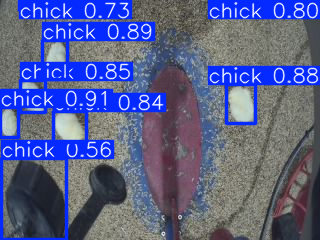

In [14]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO('best.pt')

results = model.predict('/content/chicken/KF0081_01_01_20240105_113915_00000.jpg')

for result in results:
  result.show()

In [ ]:
!unzip /content/00.zip

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data = '/content/dataset_newbest/data.yaml',
    epochs = 3,
    imgsz = 640,
    batch = 16,
    name = 'yolo-250805'
    )

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_newbest/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo-250805, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

train: Scanning /content/dataset_newbest/train/labels... 1000 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:01<00:00, 943.00it/s]

train: /content/dataset_newbest/train/images/13_250424_CH1_10_20250424043108_frame1_patch_22_jpg.rf.357f4ca98e2a090c1d601a9ff5f5a085.jpg: 1 duplicate labels removed
train: /content/dataset_newbest/train/images/16_250427_CH1_10_20250427044004_frame1_patch_00_jpg.rf.3001d0ddedb6e57af8d88f7b86a9ec01.jpg: 1 duplicate labels removed


train: New cache created: /content/dataset_newbest/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1028.9±291.1 MB/s, size: 42.0 KB)


val: Scanning /content/dataset_newbest/train/labels.cache... 1000 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]

train: /content/dataset_newbest/train/images/13_250424_CH1_10_20250424043108_frame1_patch_22_jpg.rf.357f4ca98e2a090c1d601a9ff5f5a085.jpg: 1 duplicate labels removed
train: /content/dataset_newbest/train/images/16_250427_CH1_10_20250427044004_frame1_patch_00_jpg.rf.3001d0ddedb6e57af8d88f7b86a9ec01.jpg: 1 duplicate labels removed
Plotting labels to runs/detect/yolo-250805/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolo-250805
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.333      2.011        1.2        705        640:  62%|██████▏   | 39/63 [09:48<05:41, 14.22s/it]